In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from HANCModel import HANCModelClass

In [2]:
model = HANCModelClass(name='test')

ss = model.ss
par = model.par

ss.r = 0.01
ss.w = 0.9

In [3]:
ss.A_hh

nan

In [4]:
model.solve_hh_ss(do_print=True)

household problem in ss solved in 3.3 secs [206 iterations]


In [5]:
print(par.varphi_grid)

[0.9 1.1]


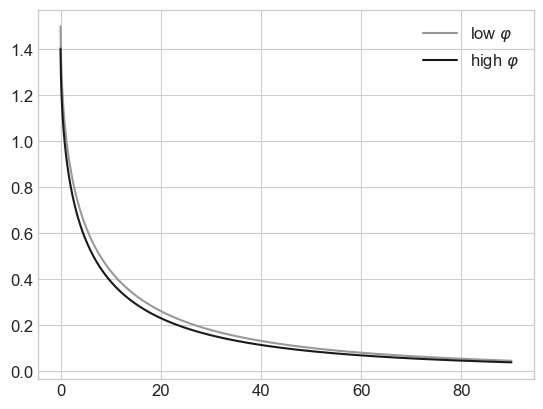

In [6]:
# plt.plot(par.a_grid,ss.c[0,1,:])

plt.plot(par.a_grid,ss.ell[0,1,:], color = '0.6', label = r'low $\varphi$')
plt.plot(par.a_grid,ss.ell[1,1,:], color = '0.1', label = r'high $\varphi$')
plt.legend()

plt.show()

In [21]:
par.beta*(1+(1-par.tau_a)*ss.r)

1.0459895556506629

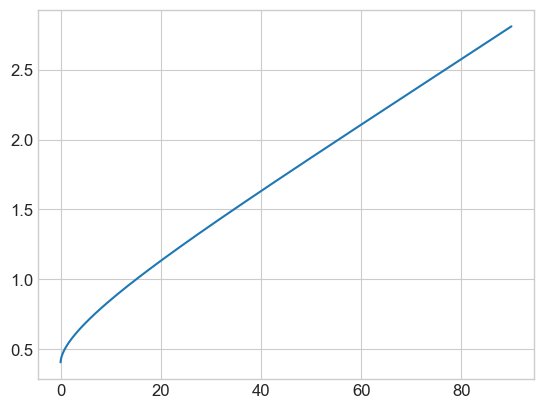

In [7]:
plt.plot(par.a_grid, ss.c[0,0,:])

Compute aggregate capital and labour supply

In [74]:
par.beta*(1+ss.r)

0.9964617907674477

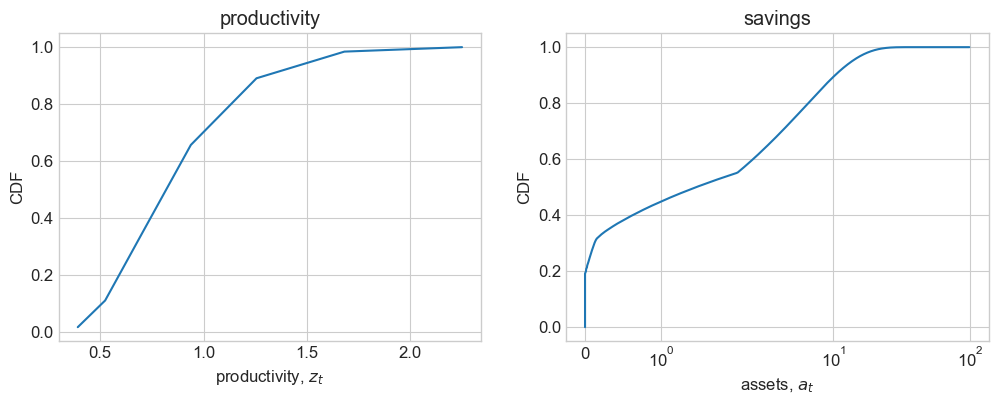

In [10]:
fig = plt.figure(figsize=(12,4),dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('productivity')
ax.plot(par.z_grid,np.cumsum(np.sum(ss.D,axis=(0,2))))

ax.set_xlabel('productivity, $z_{t}$')
ax.set_ylabel('CDF')

# b. assets
ax = fig.add_subplot(1,2,2)
ax.set_title('savings')
ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),np.insert(np.cumsum(np.sum(ss.D,axis=(0,1))),0,0.0),label='discrete')
ax.set_xlabel('assets, $a_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')

In [58]:
model.simulate_hh_ss(do_print=True)

household problem in ss simulated in 1.3 secs [184 iterations]


In [8]:
model.find_ss(do_print=True)

 K_ss =   3.1513
 L_ss =   1.0223


In [9]:
par.beta*(1+ss.r)

0.9949595945679965

In [168]:
ss.r

0.03641731486401634

In [203]:
ss.clearing_C

-4.104246165148595e-09

In [204]:
model.find_ss(do_print=True)

 K_ss =   3.1513
 L_ss =   1.0223


In [217]:
ss.clearing_A

3.4431901774212292e-12

In [223]:
ss.L

1.022255689179954